In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

### Importing datasets and merging them

In [3]:
# merge student-mat dataframe and student-por dataframe

# read student-mat.csv
df1 = pd.read_csv('student-mat.csv', sep=';')
df2 = pd.read_csv('student-por.csv', sep=';')

In [4]:
# check the shape of df1 and df2
print(df1.shape)
print(df2.shape)

(395, 33)
(649, 33)


In [5]:
# Merging two dataframes by their columns name
merged_df = pd.concat([df1, df2], axis=0)
merged_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Features Engineering on adding columns
* Categorical columns on 'pass' or 'fail' on each subject.
* Categorical columns on grades on each subject.

In [6]:
# Add a binary categorical variable called "finalResult", with level "pass" if the variable G3 is greater or equal to 10 and "fail" otherwise.

merged_df['finalResult'] = np.where(merged_df['G3'] >= 10, 'pass', 'fail')
merged_df.finalResult.value_counts()

finalResult
pass    814
fail    230
Name: count, dtype: int64

In [7]:
# Add a categorical variable called "academicGrade", with five levels "A", "B", "C", "D", "E" 
# depending on whether the variable G3 is between 16 and 20, 14 and 15, 12 and 13, 10 and 11, 0 and 9.

# Define a function that maps G3 values to academic grades
def get_academic_grade(g3):
    if g3 >= 16:
        return 'A'
    elif g3 >= 14:
        return 'B'
    elif g3 >= 12:
        return 'C'
    elif g3 >= 10:
        return 'D'
    else:
        return 'E'

# Use the function to create the "academicGrade" variable
merged_df['academicGrade'] = merged_df['G3'].apply(get_academic_grade)

merged_df.academicGrade.value_counts()

academicGrade
D    304
E    230
C    216
B    172
A    122
Name: count, dtype: int64

## Exploratory analysis
* Descriptive statistics
* Charts and graphs :
    * Display score Academic Grade by sex (male/female).
    * Display the school with the higgest mean G3.
    * Display relationship between finalResult and Mother and father job.
    * Display relationship between finalResult and 'Internet Access at home', 'in a romatic situation', 'numbers of absences', 'quality of the relashionship in the family'. 
    * Proportion of family sizes.

In [8]:
# Descriptive statistical analysis
merged_df.describe() 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<Axes: xlabel='famsize,Pstatus'>

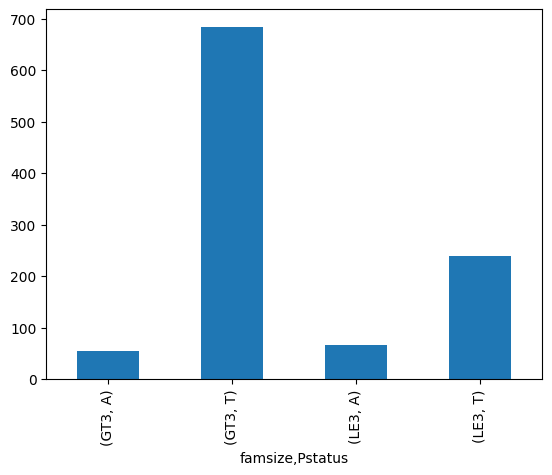

In [9]:
# group by familly columns 

merged_df.groupby(['famsize', 'Pstatus']).size()

# plot the bar chart of famsize and Pstatus

merged_df.groupby(['famsize', 'Pstatus']).size().plot(kind='bar')

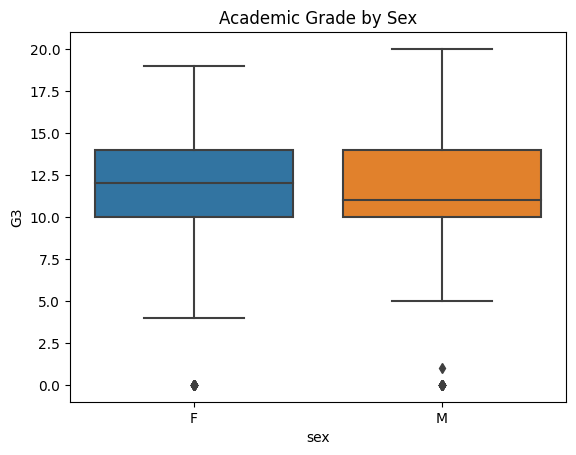

In [10]:
# group by Academic Grade by Sex

sns.boxplot(x='sex', y='G3', data=merged_df)
plt.title('Academic Grade by Sex')
plt.show()

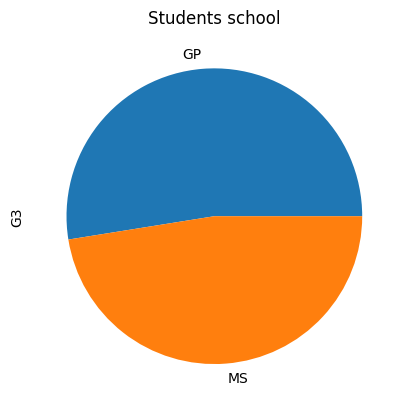

In [11]:
# Display and plot school with the higgest mean G3
merged_df.groupby('school')['G3'].mean().sort_values(ascending=False).plot(kind='pie')
# display a percentage of the pie chart
plt.title('Students school')
plt.gca().set_aspect('equal')


Text(0.5, 1.0, 'Final result according to mother job')

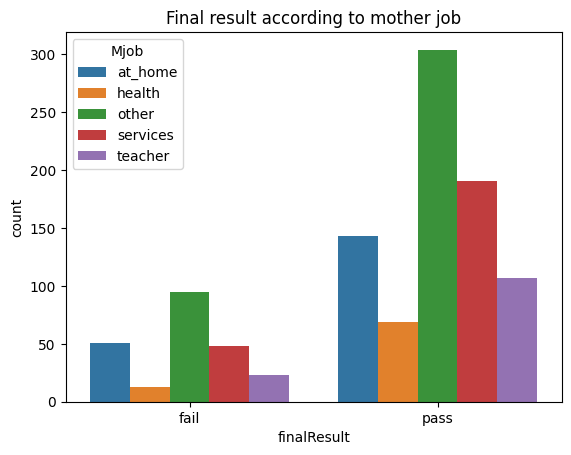

In [12]:
# Plot relationship between finalResult and Mjob and Fjob
sns.countplot(x='finalResult', hue='Mjob', data=merged_df)
plt.title('Final result according to mother job')

Text(0.5, 1.0, 'Final result according to father job')

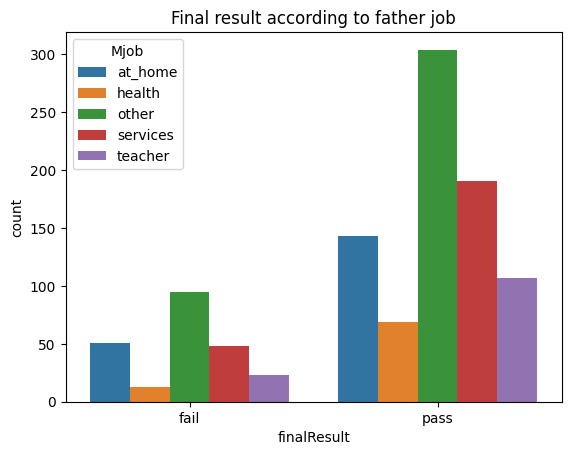

In [13]:
sns.countplot(x='finalResult', hue='Mjob', data=merged_df)
plt.title('Final result according to father job')

Text(0.5, 1.0, 'Internet Access at home')

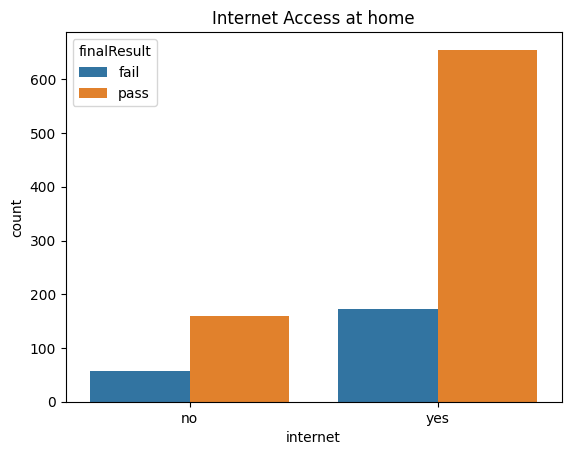

In [14]:
sns.countplot(x='internet', hue='finalResult', data=merged_df)
# add title
plt.title('Internet Access at home')

Text(0.5, 1.0, 'In a romantic relationship')

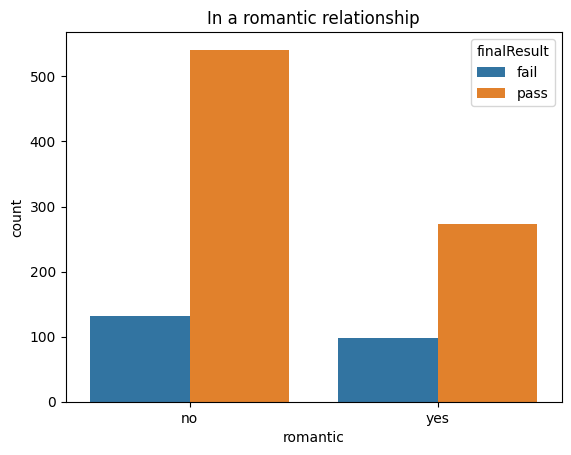

In [15]:
sns.countplot(x='romantic', hue='finalResult', data=merged_df)
# add title
plt.title('In a romantic relationship')

Text(0.5, 1.0, 'Absences in school ratio against final result')

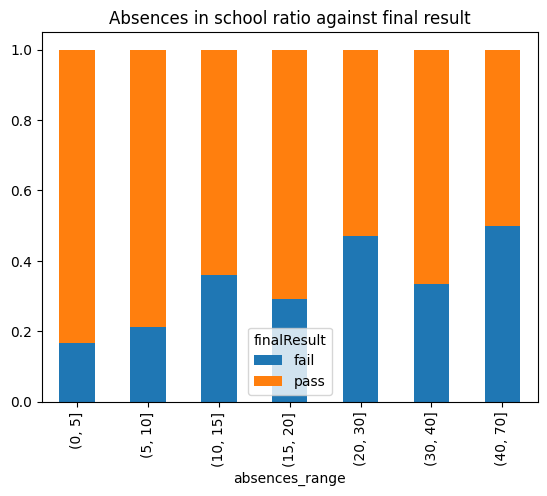

In [35]:
# group absence in range of 5, 10, 15, 20, 30, 40, 70 
merged_df['absences_range'] = pd.cut(merged_df['absences'], [0, 5, 10, 15, 20, 30, 40, 70])
# plot the bar chart of absences_range and finalResult
# get the ratio of failing and passing exam in each range
ratio = merged_df.groupby('absences_range')['finalResult'].value_counts(normalize=True).unstack()
# display the ratio
ratio.plot(kind='bar', stacked='True')
# add title
plt.title('Absences in school ratio against final result')

Text(0.5, 1.0, 'Quality of family relationships from 1 - very bad to 5 - excellent')

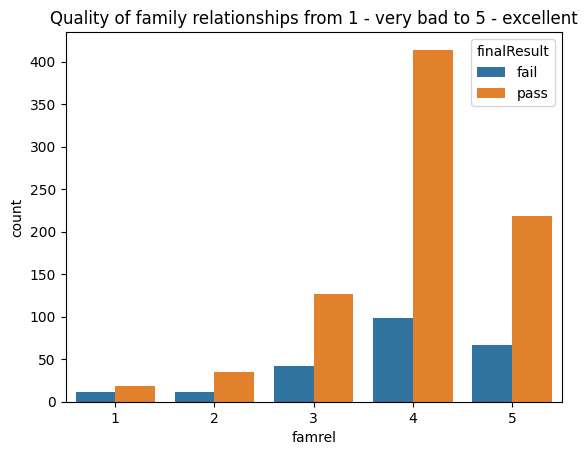

In [17]:
sns.countplot(x='famrel', hue='finalResult', data=merged_df)
plt.title('Quality of family relationships from 1 - very bad to 5 - excellent')

<Axes: ylabel='count'>

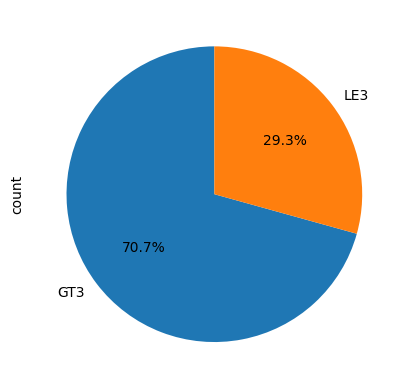

In [18]:
merged_df.columns

# Famsize - Proportion of family sizes (less than or equal to 3 or greater than 3)

fam = merged_df['famsize'].value_counts()
fam.plot.pie(autopct='%1.1f%%', shadow=False, startangle=90)

### Analysis of each features one by one

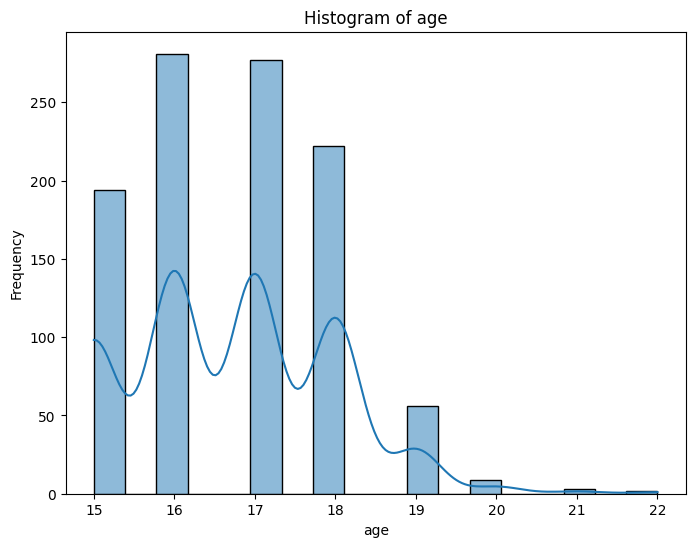

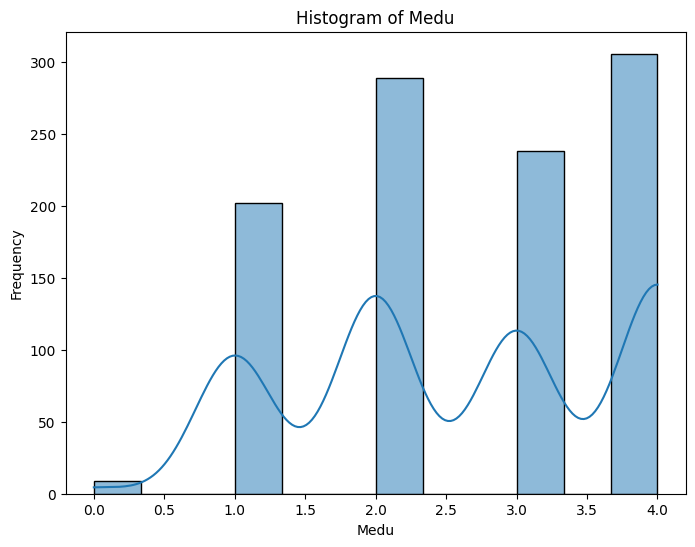

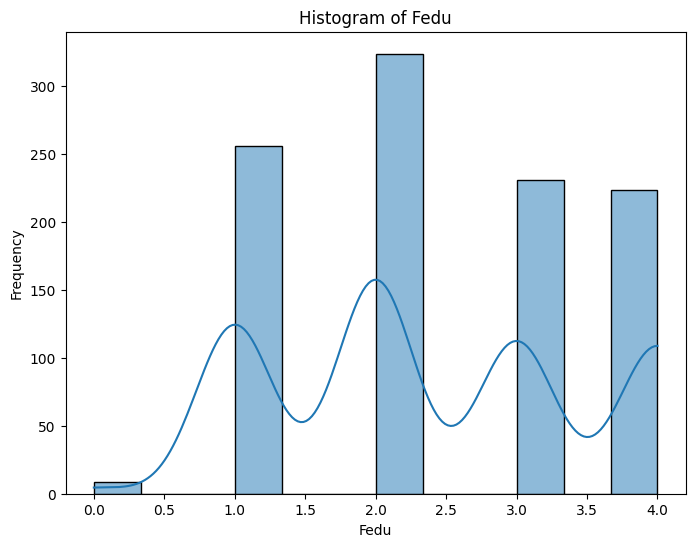

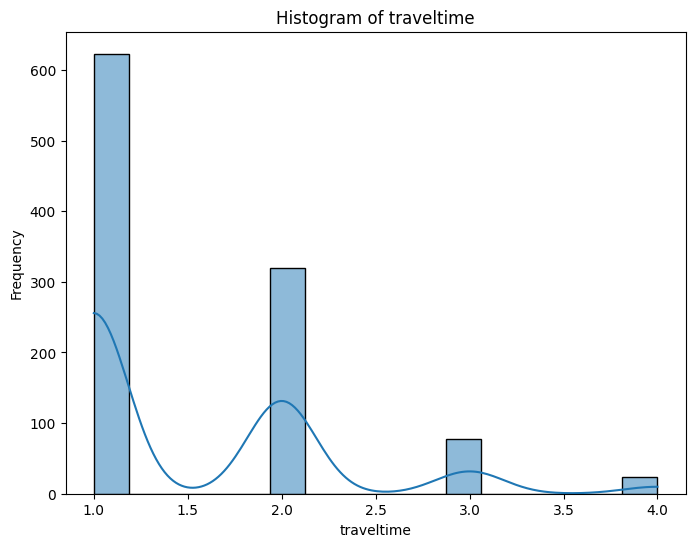

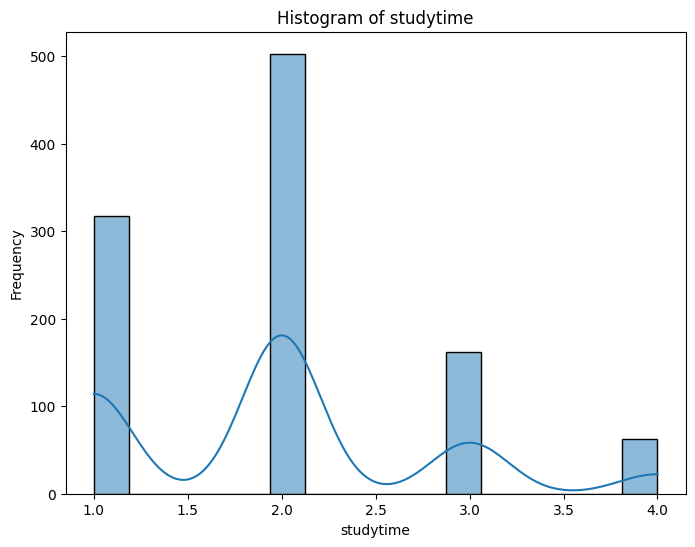

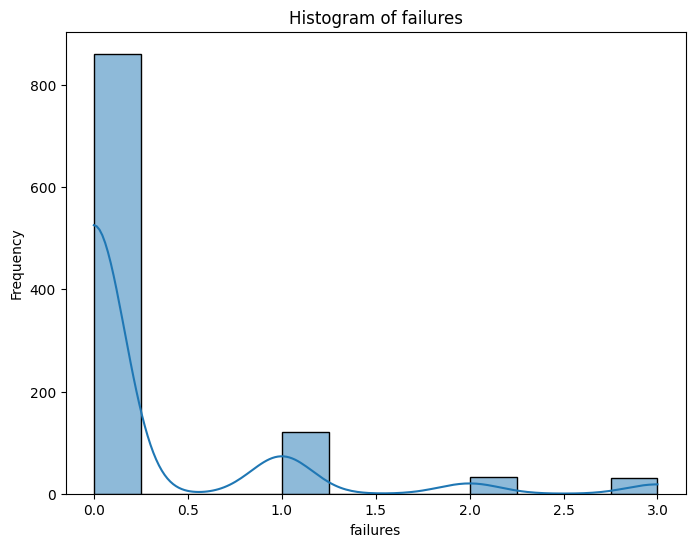

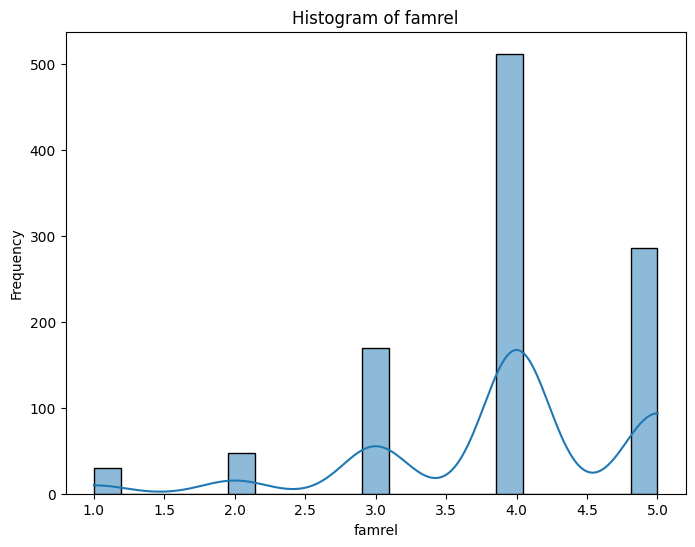

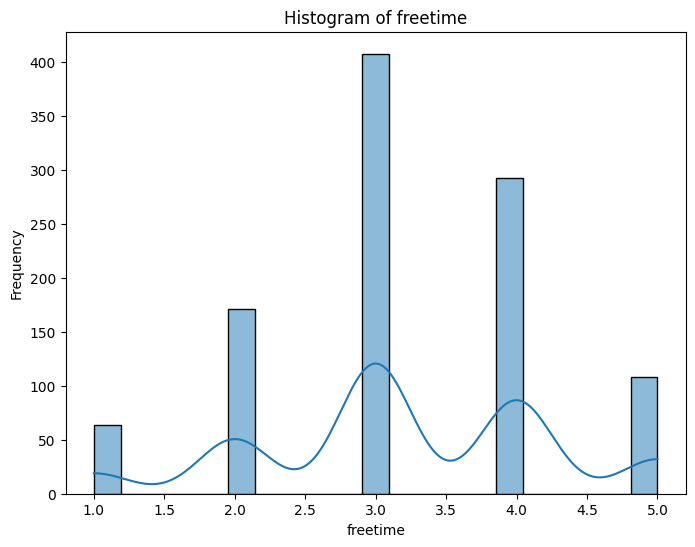

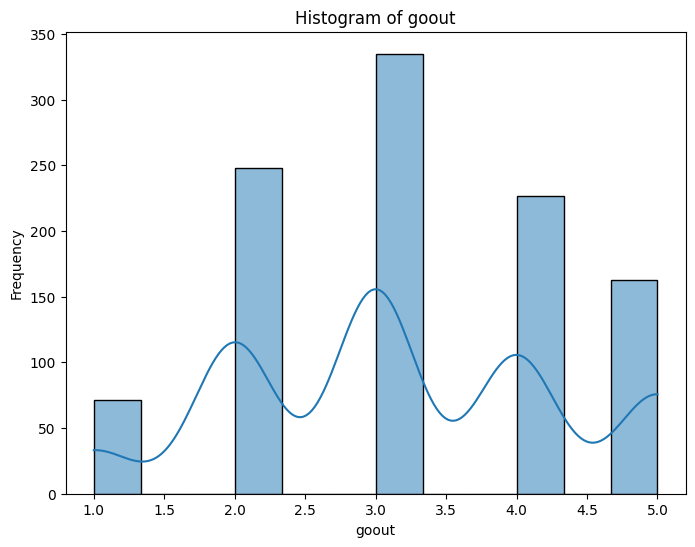

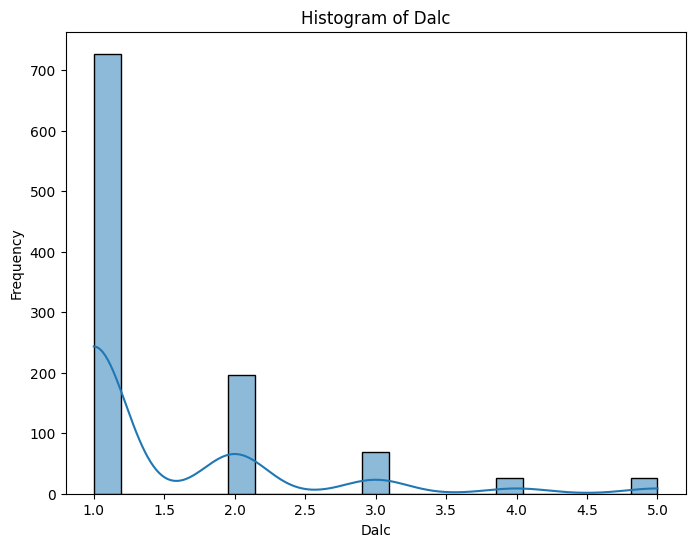

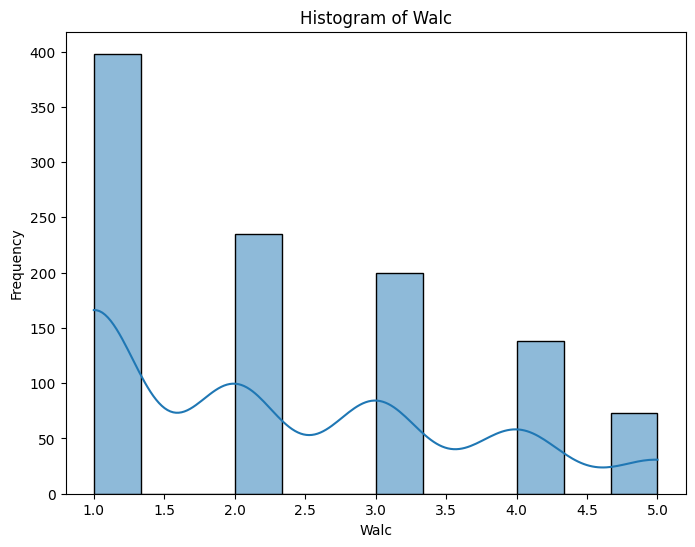

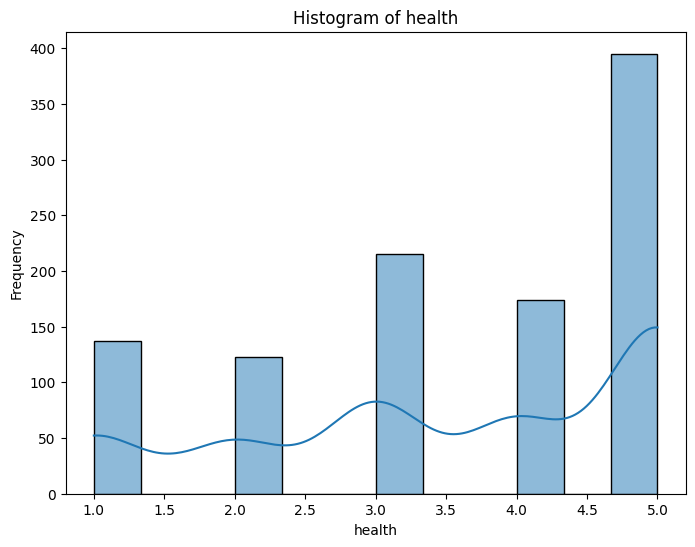

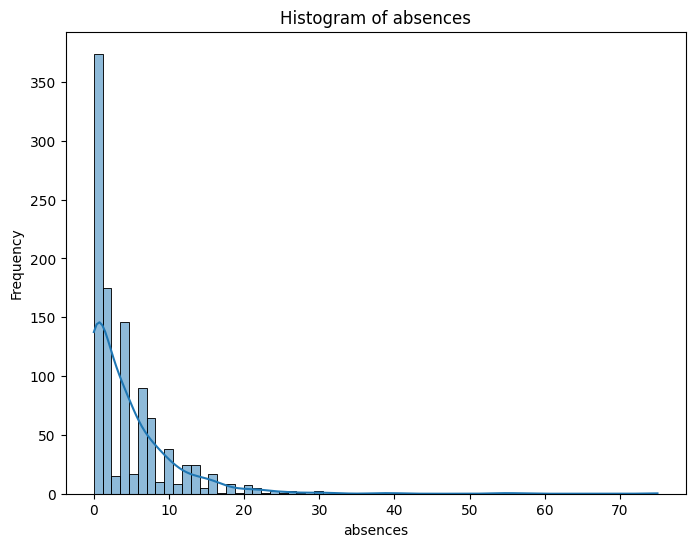

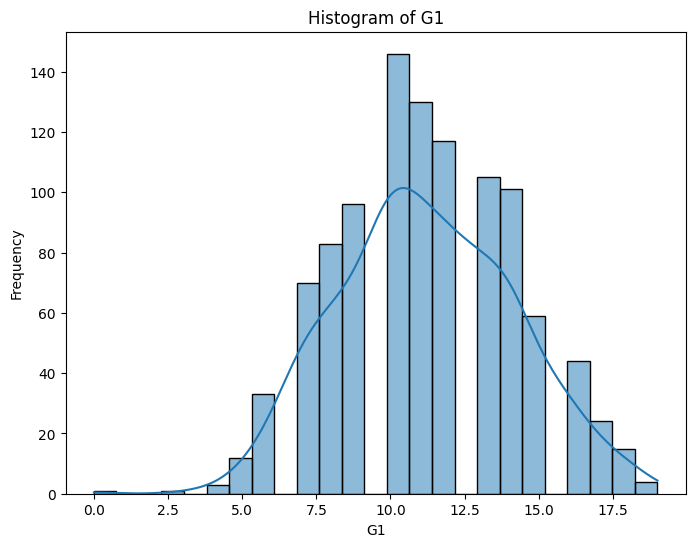

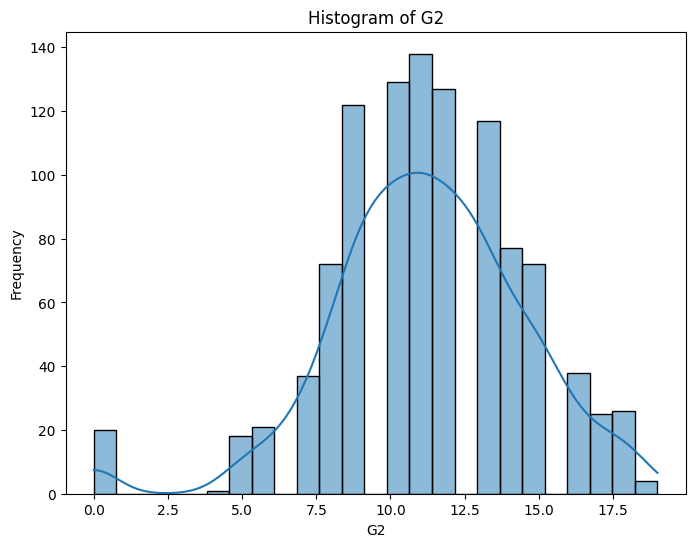

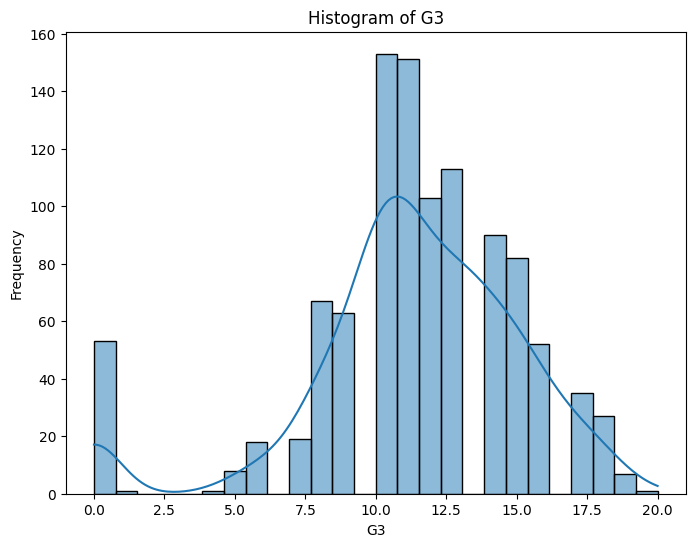

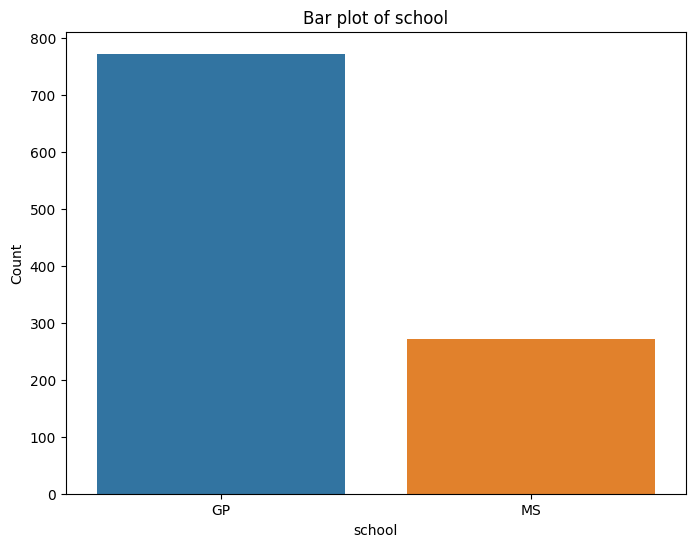

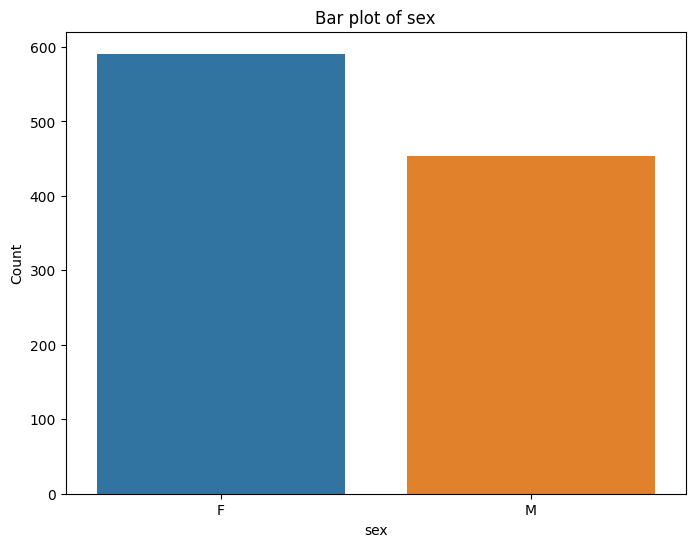

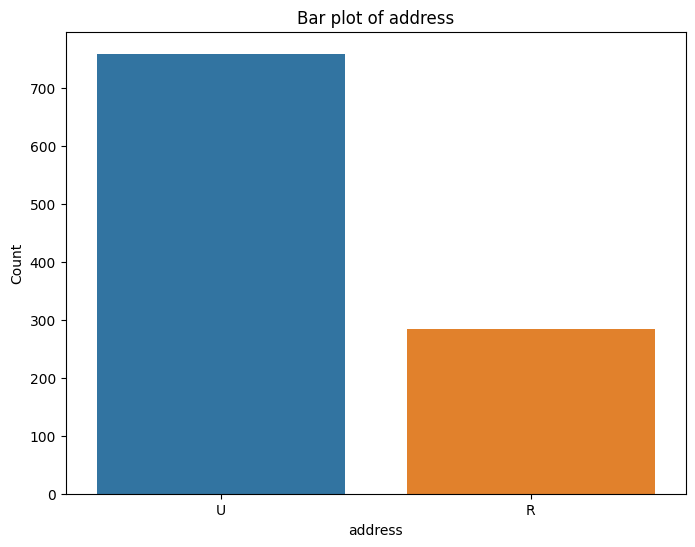

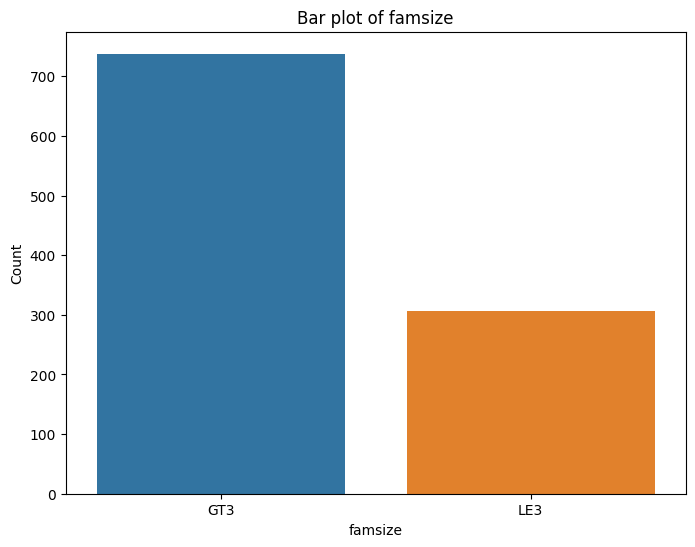

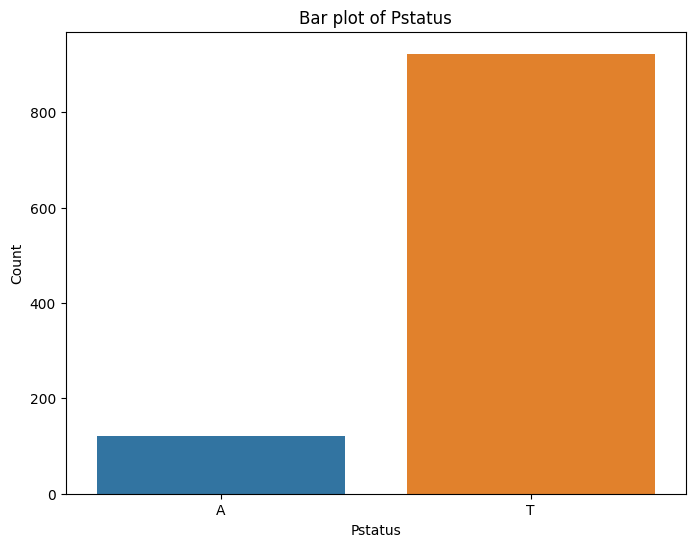

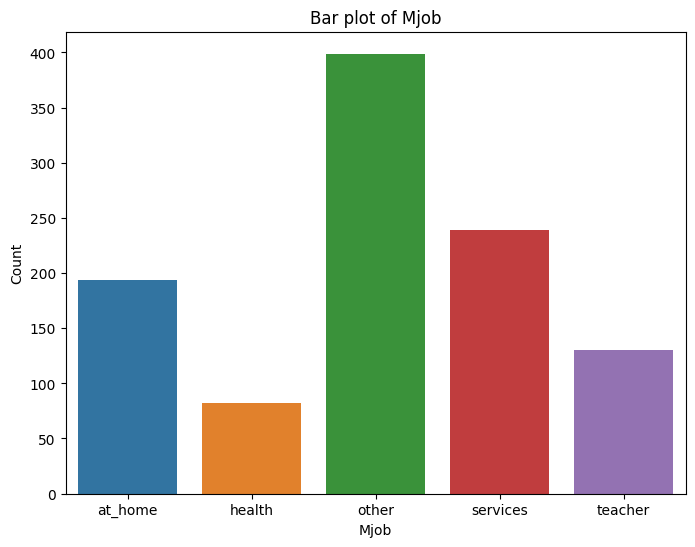

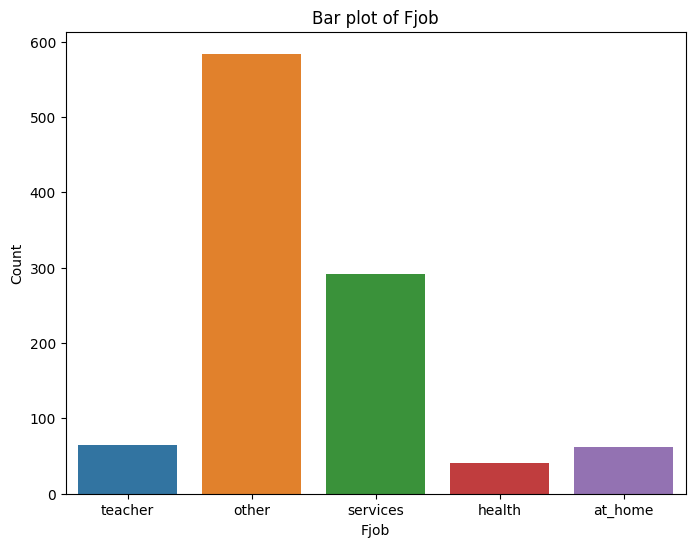

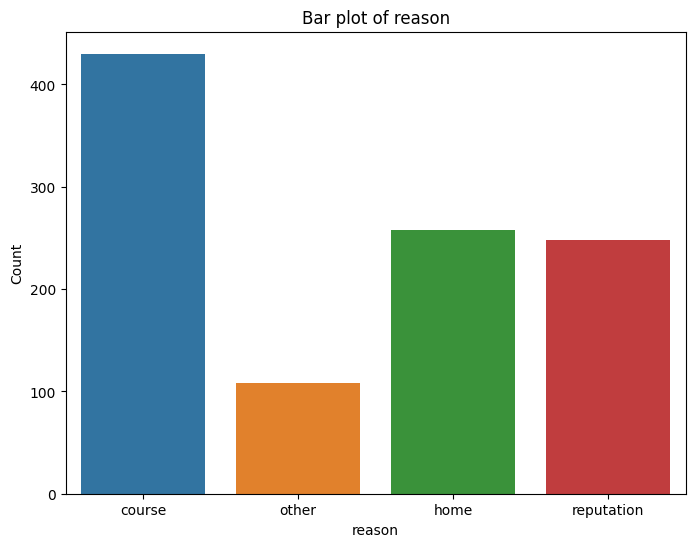

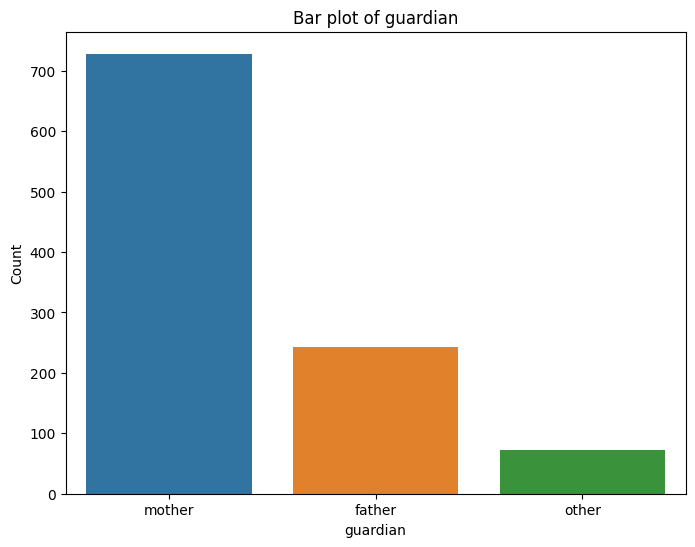

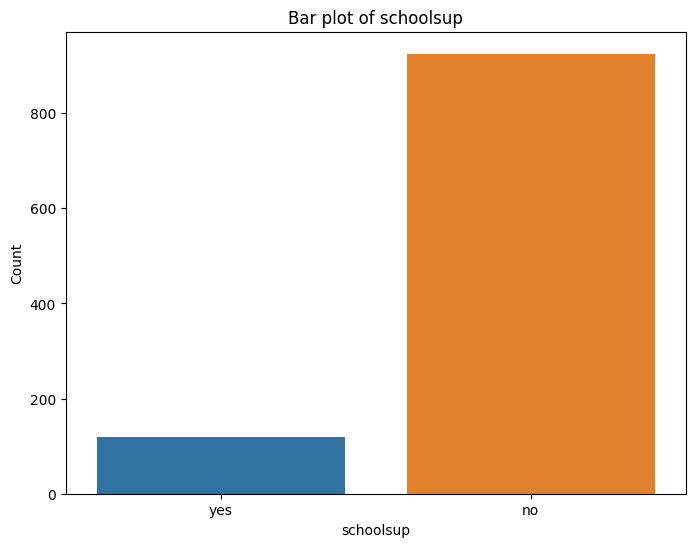

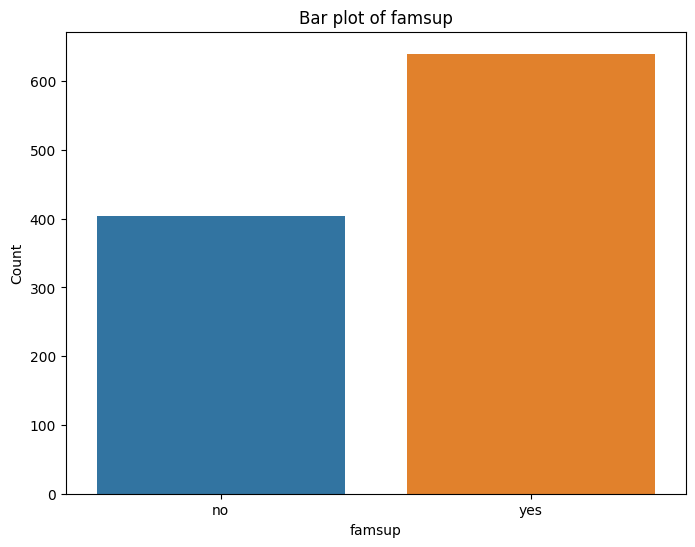

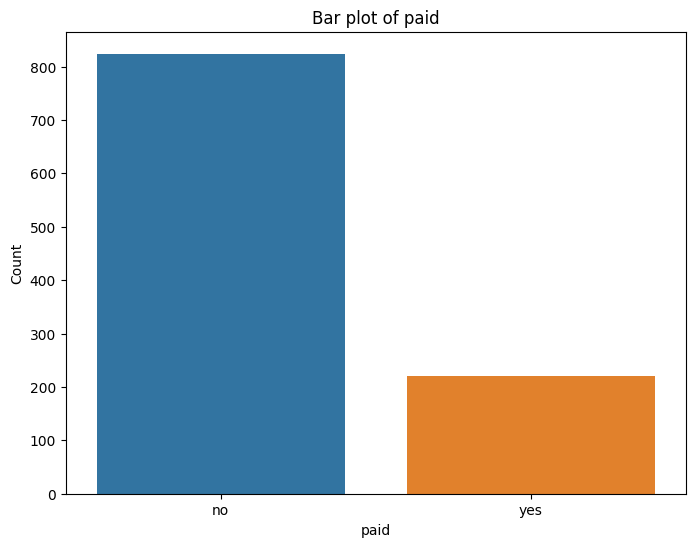

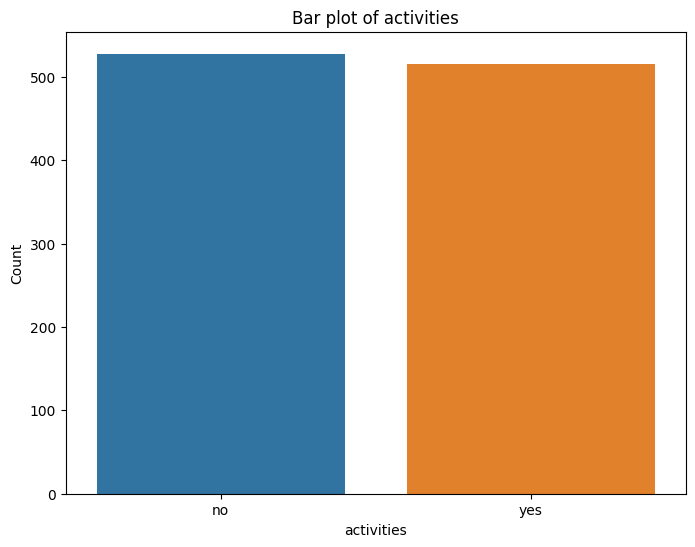

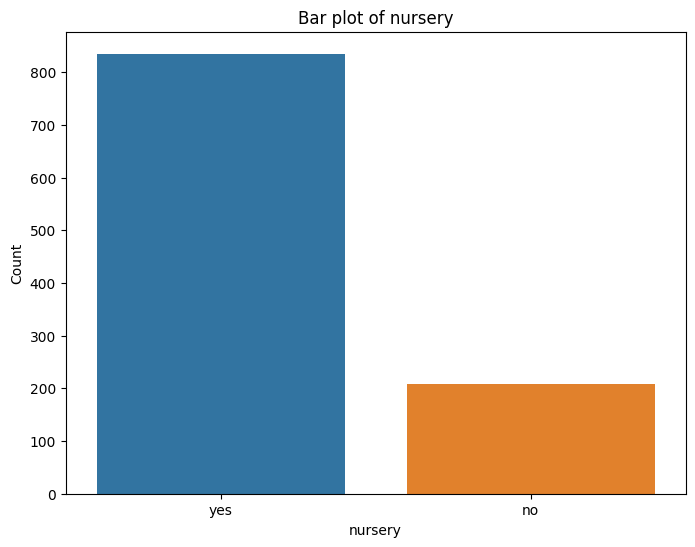

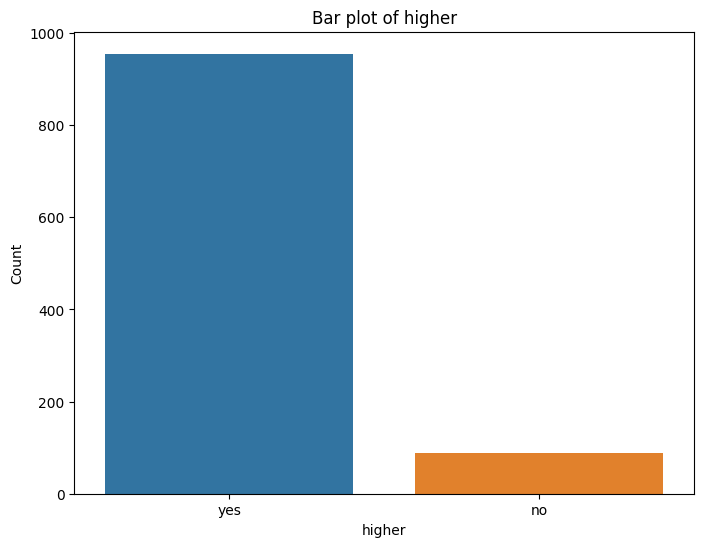

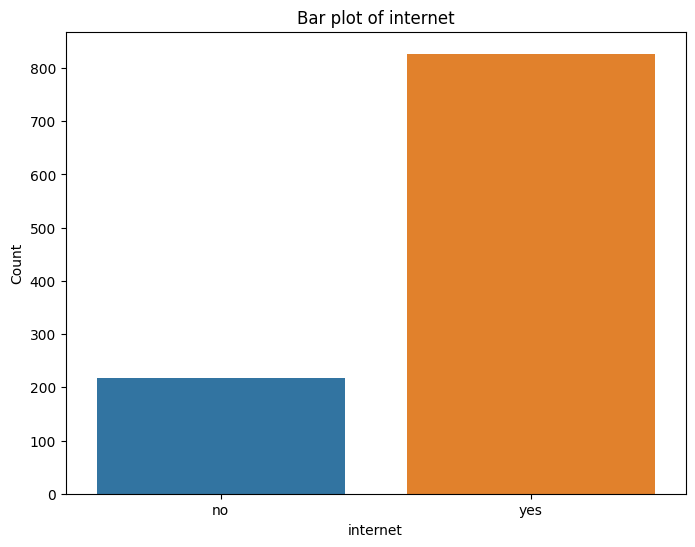

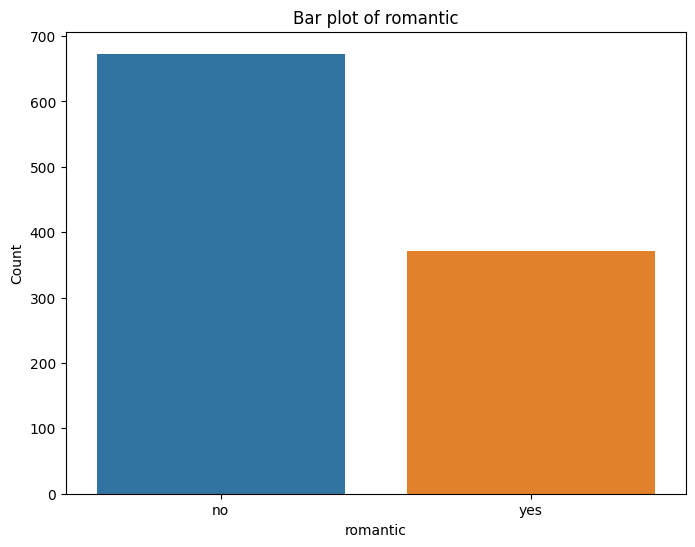

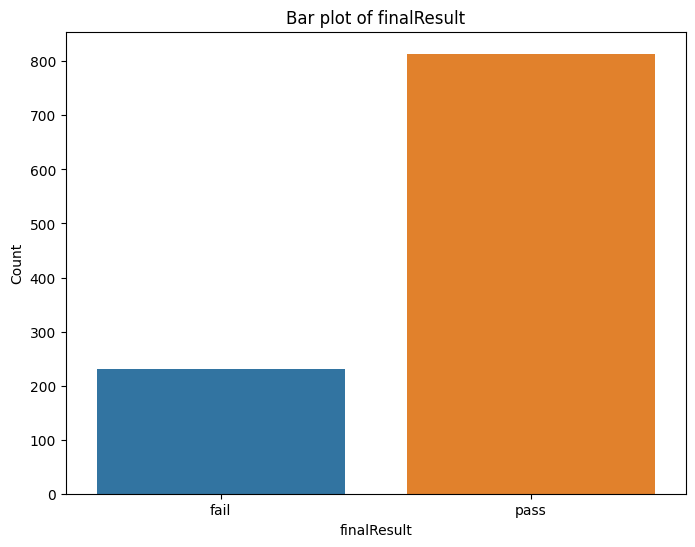

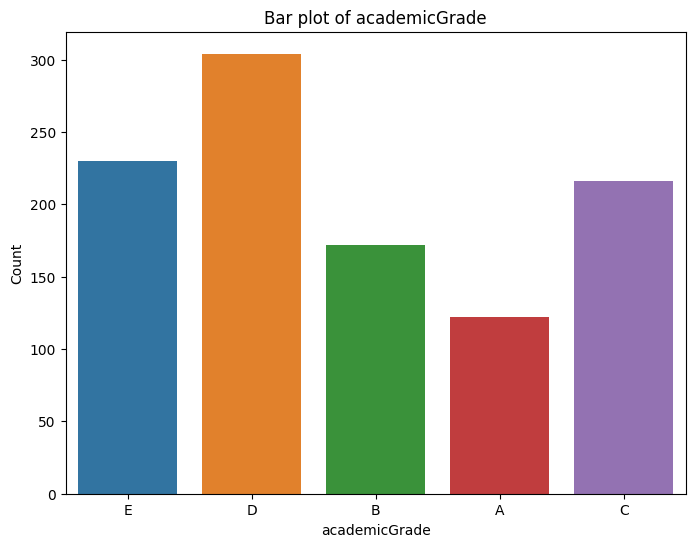

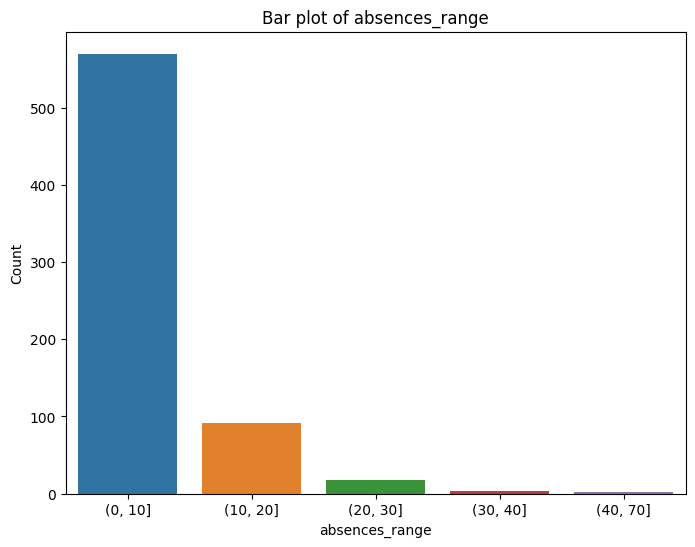

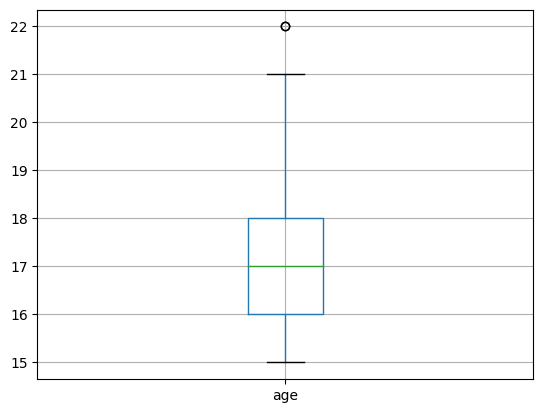

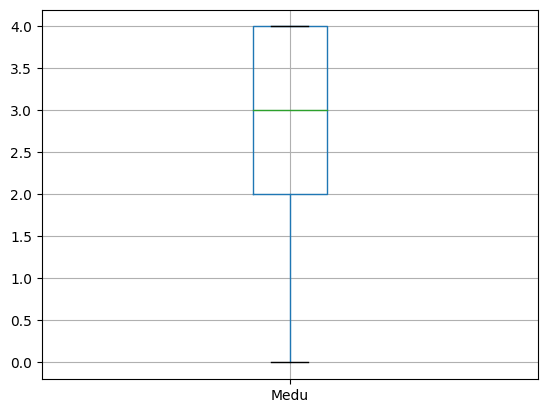

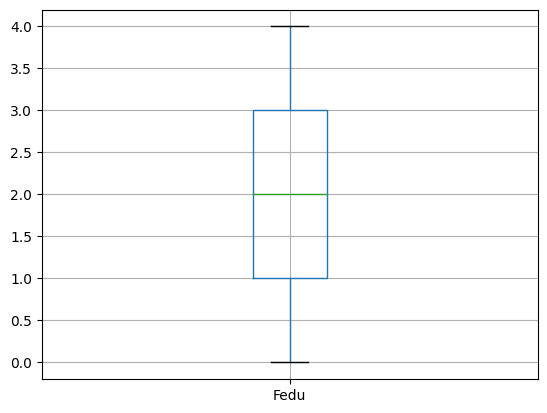

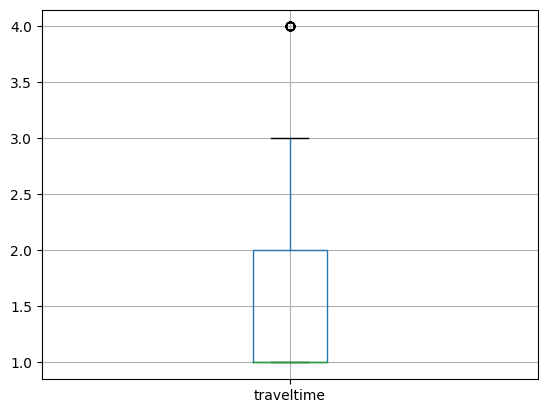

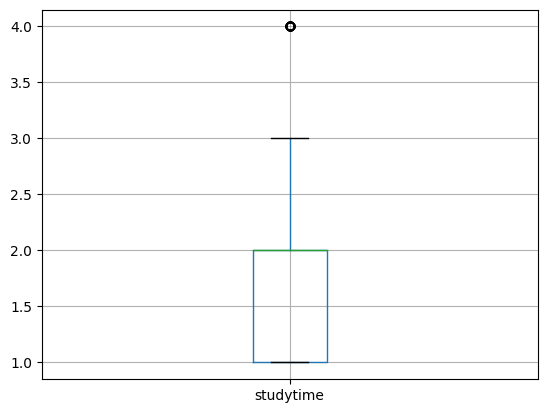

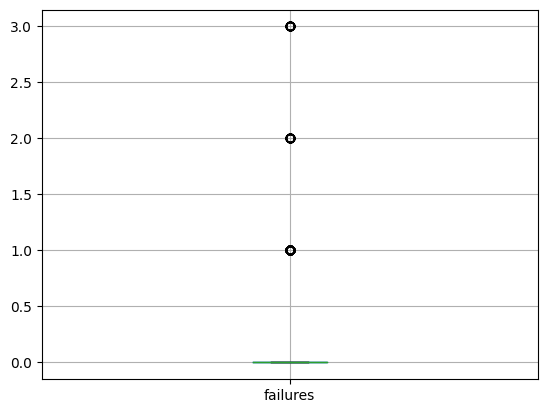

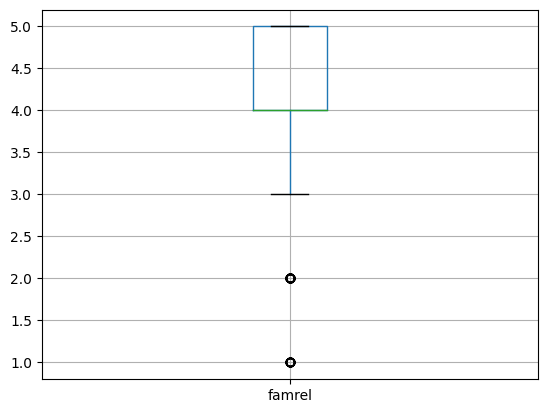

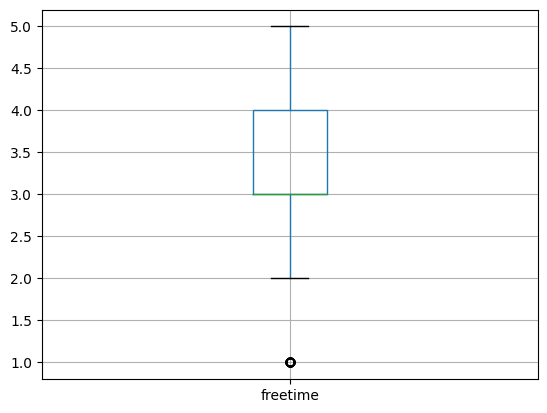

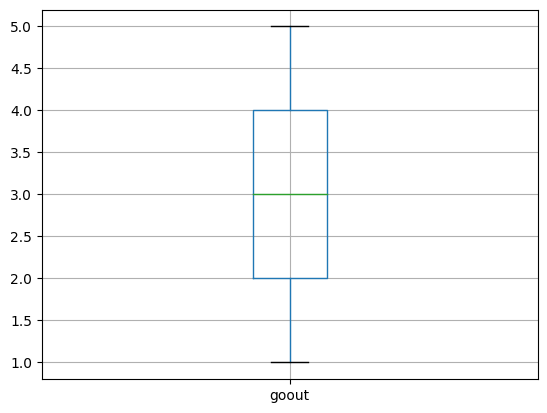

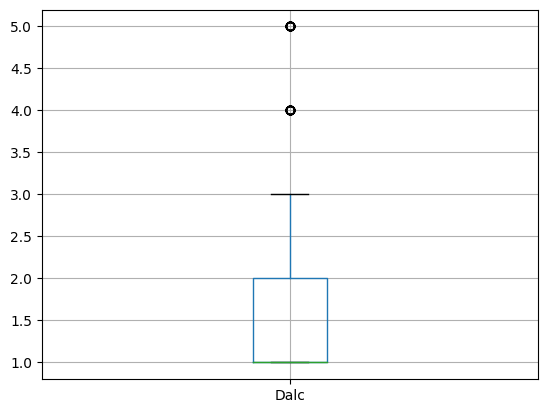

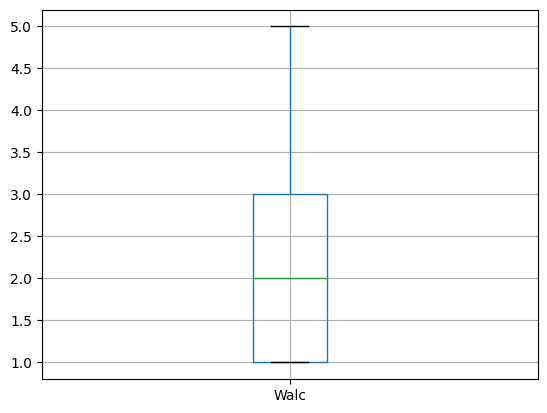

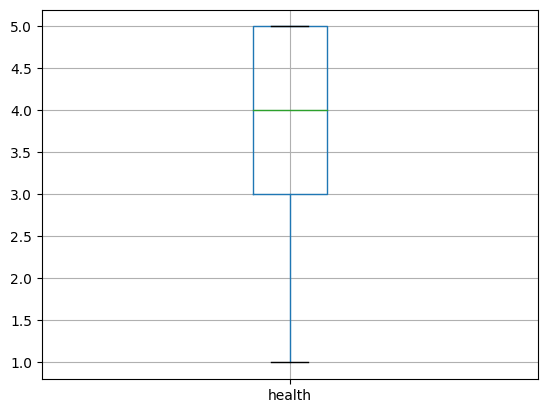

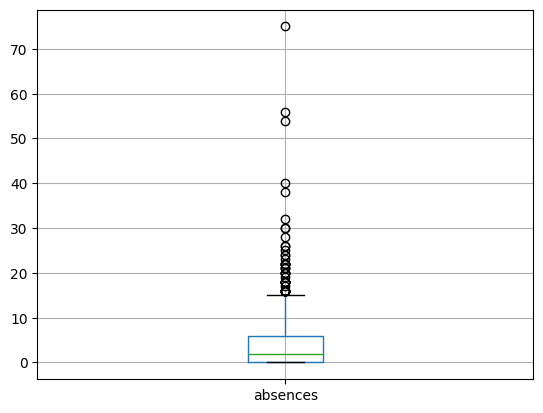

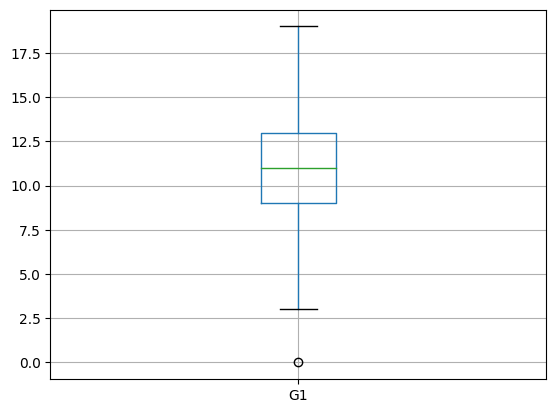

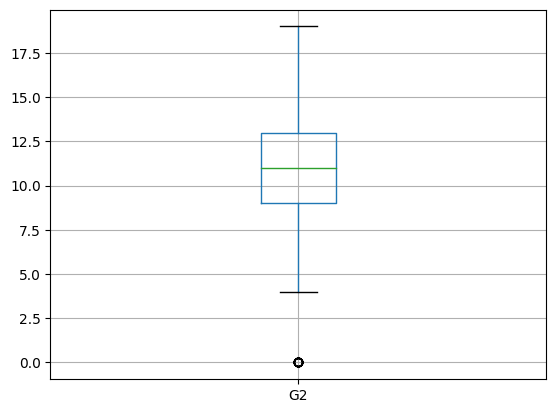

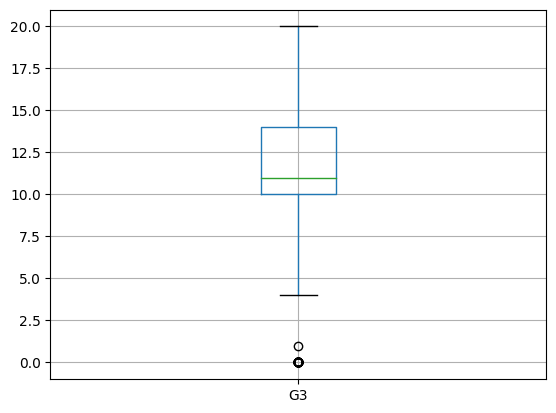

In [19]:
# Separate numerical and categorical columns
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Plot histograms for numerical columns and bar plots for categorical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=merged_df, x=col, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=merged_df, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar plot of {col}')
    plt.show()

# add boxplots for numerical columns
for col in numerical_cols:
    boxplot = merged_df.boxplot(column=[col])
    plt.show()

## Analysis on features interactions beetween "G3", "finalResult" and "academicGrade".

In [20]:
# Features interactions 
# select G3 finalResult and academicGrade columns
merged_df[['G3', 'finalResult', 'academicGrade']]

,G3,finalResult,academicGrade
0,6,fail,E
1,6,fail,E
2,10,pass,D
3,15,pass,B
4,10,pass,D
...,...,...,...
644,10,pass,D
645,16,pass,A
646,9,fail,E
647,10,pass,D


### Categorical correlation analysis

In [21]:
# categorical columns chi square test
# apply chi square test to check the relationship between categorical variables
# define a function that takes two categorical variables and returns the p-value of the chi square test
def chi_square_test(col1, col2):
    df = pd.crosstab(merged_df[col1], merged_df[col2])
    chi2, pval, dof, expected = chi2_contingency(df)
    return chi2, pval

In [22]:
# Do the stats for finalResult and every categorical column in categorical_cols and order the results in order of the hightest p-value

# print if the p-value is higher than 0.05 is probaly independent

for col in categorical_cols:
    print(f'Chi square and p-value test for "{col}" and "finalResult": {chi_square_test(col, "finalResult")[1] > 0.05}')
    print(f'Chi square and p-value test for "{col}" and "academicGrade": {chi_square_test(col, "academicGrade")[1] > 0.05}')
    print('---------------------------------------------')

    """Columns that are both correlated with 'finalResult' and 'academicGrade' are :
    - sex
    - famsize
    - Pstatus
    - famsup
    - activities
    """

Chi square and p-value test for "school" and "finalResult": False
Chi square and p-value test for "school" and "academicGrade": False
---------------------------------------------
Chi square and p-value test for "sex" and "finalResult": True
Chi square and p-value test for "sex" and "academicGrade": True
---------------------------------------------
Chi square and p-value test for "address" and "finalResult": False
Chi square and p-value test for "address" and "academicGrade": False
---------------------------------------------
Chi square and p-value test for "famsize" and "finalResult": True
Chi square and p-value test for "famsize" and "academicGrade": True
---------------------------------------------
Chi square and p-value test for "Pstatus" and "finalResult": True
Chi square and p-value test for "Pstatus" and "academicGrade": True
---------------------------------------------
Chi square and p-value test for "Mjob" and "finalResult": True
Chi square and p-value test for "Mjob" and 

### Correlation analysis for numerical column 'G3'


In [36]:
# Paerson correlation test

test = pearsonr(merged_df['G3'], merged_df['studytime'])

# print for paerson correlation test for G3 and every numerical column in numerical_cols and order the results.
p_values = []
for col in numerical_cols:
    p_values.append(pearsonr(merged_df['G3'], merged_df[col])[1])
    # sort the p_values list and the name of the columns in numerical_cols
    p_values.sort()
    

In [24]:
for col in numerical_cols:
    print(f'p-value test for "{col}" and "G3": {pearsonr(merged_df["G3"], merged_df[col])[1]}')
    
    """
    Top columns that are negatively correlated with G3 are:
    
    - failures (number of past class failures)
    - medu (mother's education)
    - studytime (weekly study time)
    
    Top columns that are positively correlated with G3 are:
    
    - absences (number of school absences)
    - famrel (quality of family relationships)
    - freetime (free time after school)
    """

p-value test for "age" and "G3": 4.925114665687323e-05
p-value test for "Medu" and "G3": 5.050893883962702e-11
p-value test for "Fedu" and "G3": 2.0987704930541969e-07
p-value test for "traveltime" and "G3": 0.0008976537212023221
p-value test for "studytime" and "G3": 1.5152693054022881e-07
p-value test for "failures" and "G3": 7.665909219357272e-38
p-value test for "famrel" and "G3": 0.07859652275624796
p-value test for "freetime" and "G3": 0.03605136660070904
p-value test for "goout" and "G3": 0.0015437679583543704
p-value test for "Dalc" and "G3": 2.6504690375903644e-05
p-value test for "Walc" and "G3": 0.00017839564339315798
p-value test for "health" and "G3": 0.00964010515995336
p-value test for "absences" and "G3": 0.14030311791021247
p-value test for "G1" and "G3": 7.556322399729373e-243
p-value test for "G2" and "G3": 0.0
p-value test for "G3" and "G3": 0.0


<Axes: >

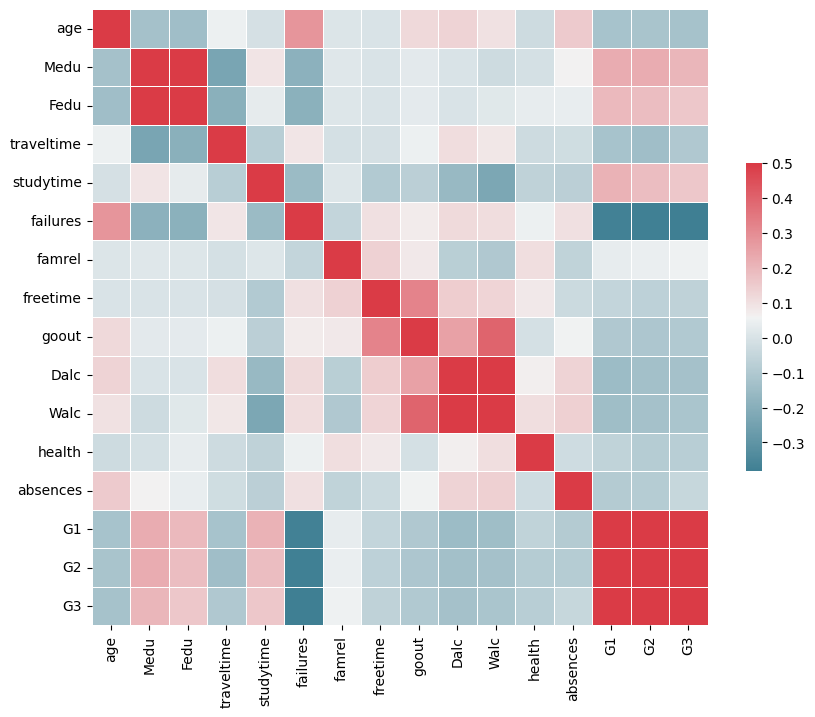

In [42]:
# Compute the correlation matrix
corr = merged_df[numerical_cols].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data=corr, mask=None, cmap=cmap, vmax=.5, square=True, 
            xticklabels=True, yticklabels=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
# save in dataframe 

merged_df.to_csv('merged_df.csv', index=False)